In [3]:
import cv2
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
def create_histogram(img):
    histogram = [0]*256
    for row in range(img.shape[0]):
        for col in range (img.shape[1]):
            histogram[img[row,col]] +=1
    return histogram

In [5]:
def visualize_histogram(histogram, output = 'Image/histogram.png'):
    hist_data = pd.DataFrame({'intensity':list(range(256)), 'frequency':histogram})
    sns_hist = sns.barplot(x='intensity', y= 'frequency', data = hist_data, color = 'blue')
    sns_hist.set(xticks = [])

    fig = sns_hist.get_figure()
    fig.savefig(output)
    return output

In [6]:
def equalize_histogram (img, histogram):
    new_H = [0]*257
    for i in range(0, len(new_H)):
        new_H[i] = sum(histogram[:i])
    new_H = new_H[1:]

    #scale to [0,255]
    max_value = max (new_H)
    min_value = min(new_H)
    new_H = [int(((f-min_value)/(max_value-min_value))*255) for f in new_H]

    print(new_H)

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row,col] = new_H[img[row,col]]
    
    return img

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 42, 43, 44, 45, 46, 48, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 70, 74, 78, 83, 89, 95, 102, 108, 114, 119, 124, 127, 131, 134, 137, 139, 142, 145, 149, 152, 155, 159, 162, 166, 170, 174, 178, 183, 188, 192, 196, 201, 205, 209, 213, 217, 221, 224, 227, 230, 233, 236, 238, 240, 242, 244, 246, 247, 248, 250, 251, 251, 252, 252, 253, 253, 254, 254, 

True

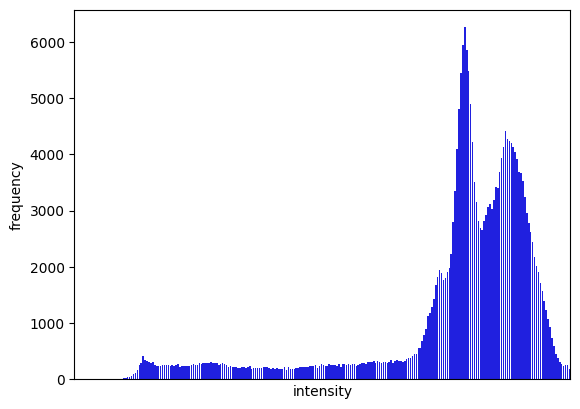

In [7]:
img = cv2.imread('Image/dog.jpg', cv2.IMREAD_GRAYSCALE)

histogram = create_histogram(img)

hist_image_path = visualize_histogram(histogram)

equalize_img = equalize_histogram(img,histogram)
cv2.imwrite('Image/equalize_img.jpg',equalize_img)